
### Next Words Prediction in Joke - CS521 Final Project - Sharmisha Parvathaneni

##### Objective: Use NLP techniques and choose a model that predicts the next words in a joke, particularly focusing on generating humorous or contextually relevant content and also to explore how NLP models can be effectively used in the field of computational humor.

#####  This notebook explores a dataset of short jokes sourced from Kaggle. We aim to preprocess this data for use in training a LSTM model to predict the next word in a joke.
#####  - Dataset CSV file: [Short Jokes Dataset](https://www.kaggle.com/datasets/abhinavmoudgil95/short-jokes)
#####  - Number of Records: 100000
##### - Number of Fields: 2











### Data Preprocessing and Exploratory Data Analysis
##### Here we preprocess the data to clean and prepare textual content for analysis. We also perform exploratory data analysis (EDA) to understand the data's characteristics better.


In [13]:
#Import Necessary Libraries and Packages
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [14]:
#Load the dataset
jokes_df = pd.read_csv('shortjokes.csv')

In [15]:
print("Number of records: ", jokes_df.shape[0])
print("Number of fields: ", jokes_df.shape[1])

Number of records:  100000
Number of fields:  2


In [16]:
jokes_df.head()

,ID,Joke
0,1,"[me narrating a documentary about narrators] ""..."
1,2,Telling my daughter garlic is good for you. Go...
2,3,I've been going through a really rough period ...
3,4,"If I could have dinner with anyone, dead or al..."
4,5,Two guys walk into a bar. The third guy ducks.


### Cleaning and Preprocessing Data

In [17]:

# Function to clean text
def clean_text(text):
    
# Convert to lowercase
    text = text.lower()
# Removing non-words
    text = re.sub(r'\W', ' ', text)
# Removing Single Characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
# Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

# Apply the cleaning function to the Joke column
jokes_df['Cleaned_Joke'] = jokes_df['Joke'].apply(clean_text)

jokes_df[['Joke', 'Cleaned_Joke']]


,Joke,Cleaned_Joke
0,"[me narrating a documentary about narrators] ""...",me narrating documentary about narrators can ...
1,Telling my daughter garlic is good for you. Go...,telling my daughter garlic is good for you goo...
2,I've been going through a really rough period ...,i ve been going through really rough period at...
3,"If I could have dinner with anyone, dead or al...",if could have dinner with anyone dead or alive...
4,Two guys walk into a bar. The third guy ducks.,two guys walk into bar the third guy ducks
...,...,...
99995,Every time I walk into a singles bar I can hea...,every time walk into singles bar can hear mom ...
99996,how wide is the universe? how long is a piece ...,how wide is the universe how long is piece of ...
99997,A man goes to a halloween party wearing nothin...,a man goes to halloween party wearing nothing ...
99998,I don't Bolivia Peru-v it.,i don bolivia peru it


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the list of stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Load the list of stopwords
stop_words = set(stopwords.words('english'))

# Removing stopwords from a sentence
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

jokes_df['No_Stopwords_Joke'] = jokes_df['Cleaned_Joke'].apply(remove_stopwords)
print(jokes_df[['Cleaned_Joke', 'No_Stopwords_Joke']].head())


[nltk_data] Downloading package punkt to /home/vvs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vvs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        Cleaned_Joke  \
0   me narrating documentary about narrators can ...   
1  telling my daughter garlic is good for you goo...   
2  i ve been going through really rough period at...   
3  if could have dinner with anyone dead or alive...   
4        two guys walk into bar the third guy ducks    

                                   No_Stopwords_Joke  
0  narrating documentary narrators hear saying cu...  
1  telling daughter garlic good good immune syste...  
2  going really rough period work week fault swap...  
3  could dinner anyone dead alive would choose al...  
4                  two guys walk bar third guy ducks  


### Distribution of Joke Lengths


In [19]:
# Number of words in each Cleaned_Joke
jokes_df['Length'] = jokes_df['Cleaned_Joke'].apply(lambda x: len(x.split()))
jokes_df['Length']

0        14
1        19
2        23
3        14
4         9
         ..
99995    21
99996    12
99997    29
99998     5
99999    10
Name: Length, Length: 100000, dtype: int64

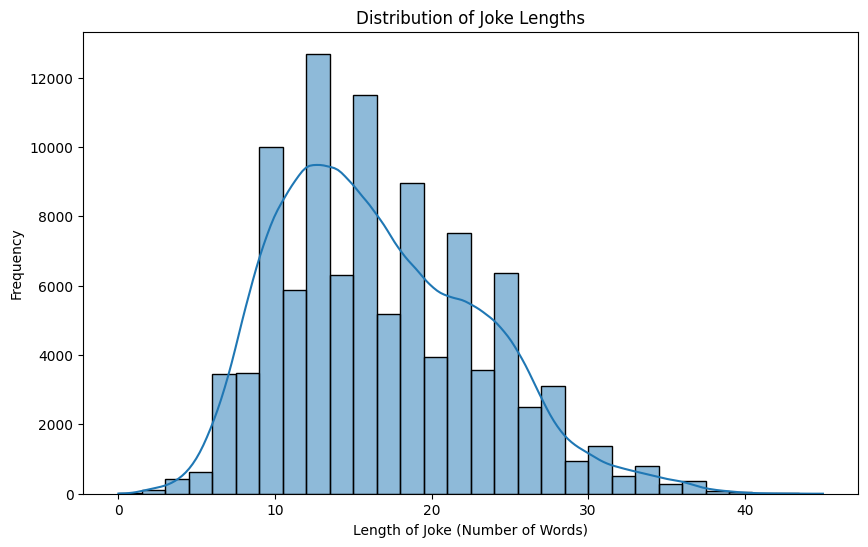

In [20]:
# Distribution of Joke Lengths
plt.figure(figsize=(10, 6))
sns.histplot(jokes_df['Length'], bins=30, kde=True)
plt.title('Distribution of Joke Lengths')
plt.xlabel('Length of Joke (Number of Words)')
plt.ylabel('Frequency')
plt.show()

##### This plot visualizes the frequency distribution of joke lengths in terms of word count. It helps in understanding the common lengths of jokes, which can inform the model about typical joke structures and predict when a punchline might occur based on the length pattern. Knowing joke lengths helps in predicting when a joke might be nearing its end, which is crucial for timing the delivery of punchlines.

### Most Common Words in Jokes


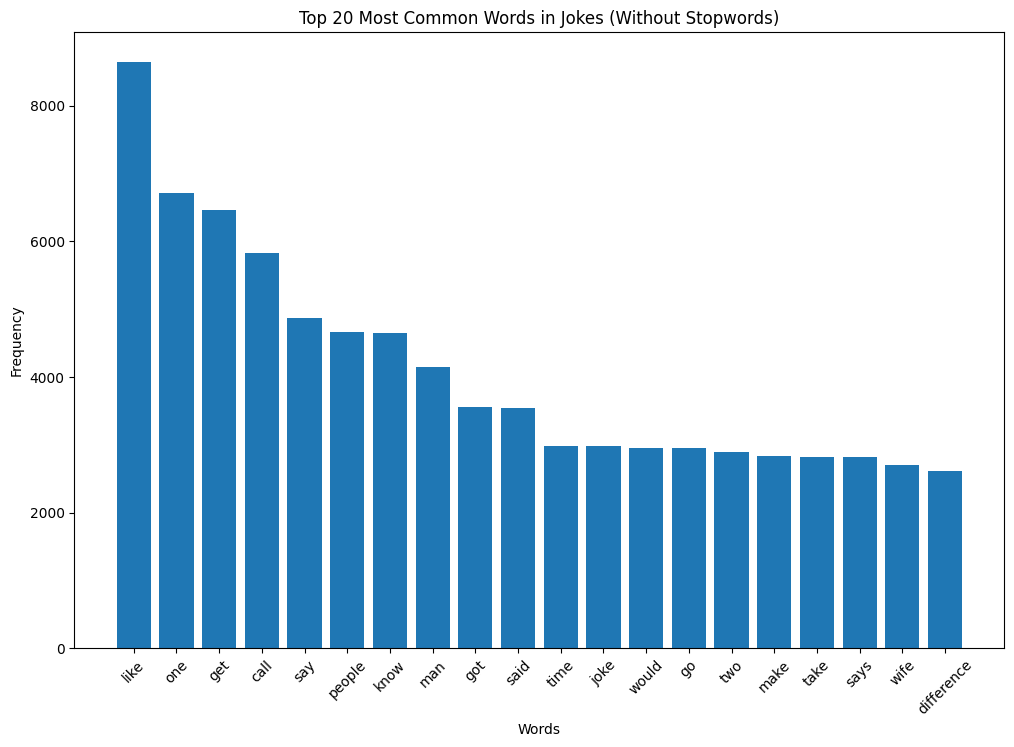

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = ' '.join(jokes_df['No_Stopwords_Joke']).split()
word_counts = Counter(all_words)

# Selecting the 20 most common words to plot
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting the word frequency distribution
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies)
plt.title('Top 20 Most Common Words in Jokes (Without Stopwords)')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


##### This bar chart shows the most frequent words used in jokes after removing stopwords. This insight can guide the choice of more likely words during the prediction of the next word in a sequence.

### Common Word Pairs and Triplets in the Dataset

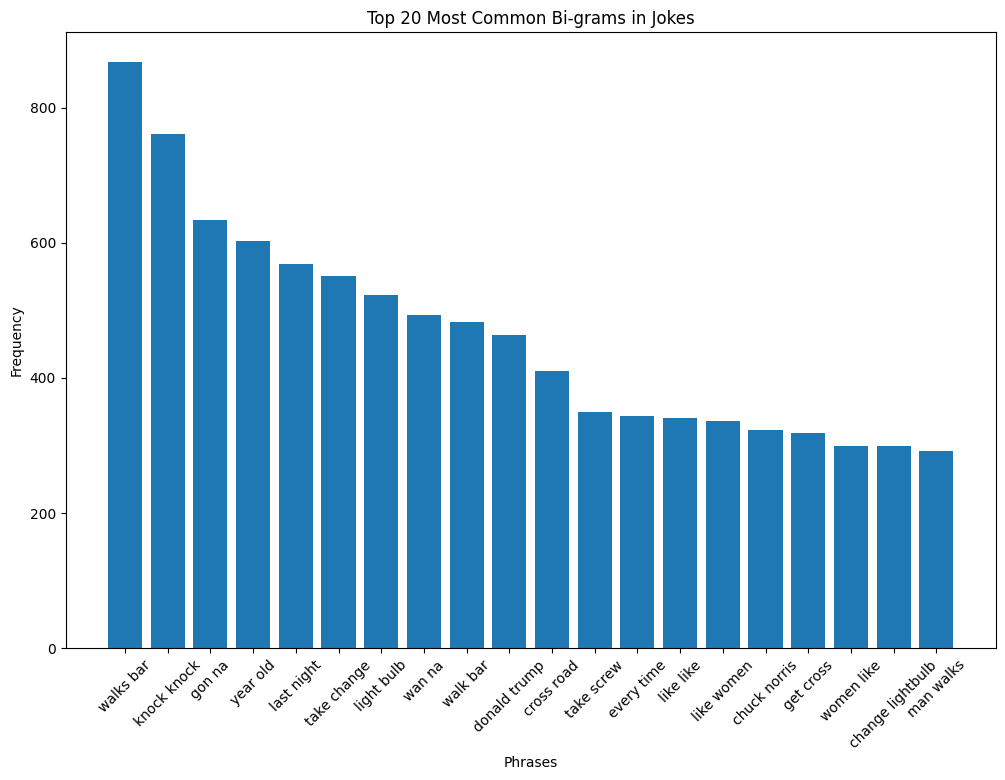

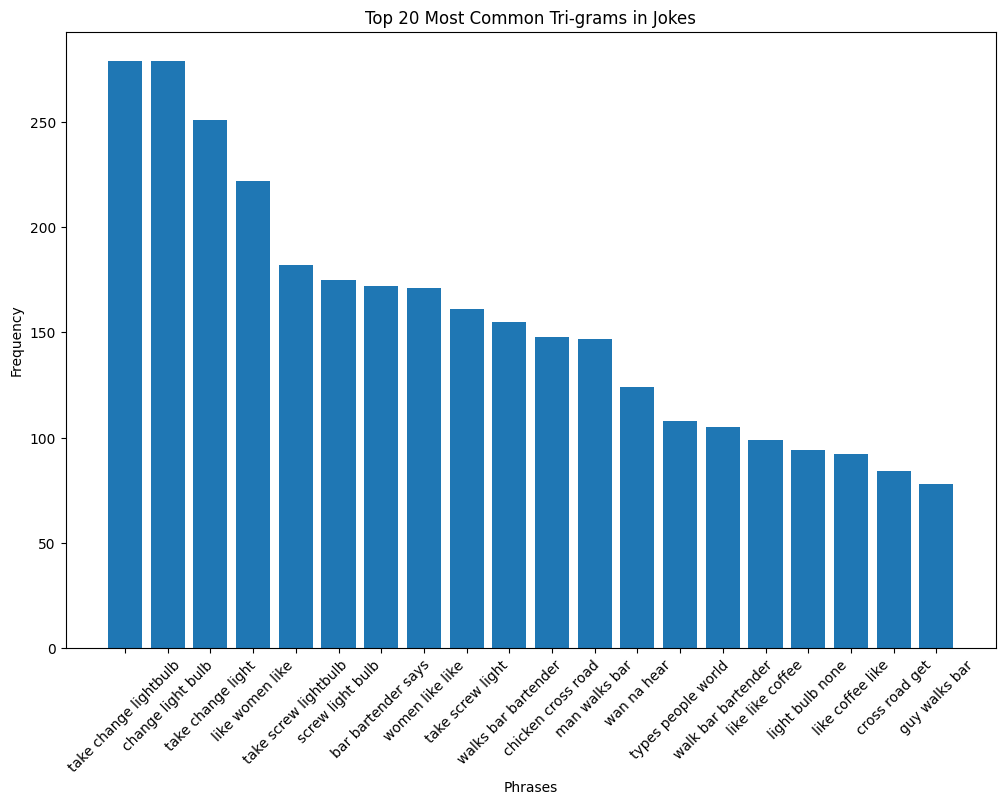

In [22]:
from nltk import bigrams, trigrams
from collections import Counter

# Generate bi-grams for all jokes
bi_grams_list = list(bigrams(all_words))
bi_gram_counts = Counter(bi_grams_list)

# Generate tri-grams for all jokes
tri_grams_list = list(trigrams(all_words))
tri_gram_counts = Counter(tri_grams_list)

# Get the 20 most common bi-grams and tri-grams
most_common_bi_grams = bi_gram_counts.most_common(20)
most_common_tri_grams = tri_gram_counts.most_common(20)

# Function to plot the n-grams
def plot_n_grams(n_grams, title):
    phrases, frequencies = zip(*n_grams)
    phrases = [' '.join(phrase) for phrase in phrases]
    
    plt.figure(figsize=(12, 8))
    plt.bar(phrases, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Phrases')
    plt.ylabel('Frequency')
    plt.show()

# Plotting the most common bi-grams
plot_n_grams(most_common_bi_grams, 'Top 20 Most Common Bi-grams in Jokes')

# Plotting the most common tri-grams
plot_n_grams(most_common_tri_grams, 'Top 20 Most Common Tri-grams in Jokes')


##### These plots show the frequency of the most common bi-grams and tri-grams. Understanding these can provide context for predicting word sequences in jokes, as certain word pairs or triplets are more likely to occur together. N-gram analysis helps capture the local context within jokes, which is crucial for generating or predicting coherent and humorous text sequences.

### Contextual Word Analysis for Target Words in Jokes

In [23]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

def find_context(texts, target_words):
    before_words = Counter()
    after_words = Counter()

    for text in texts:
        # Tokenize the text into words
        words = word_tokenize(text)
        
        for i, word in enumerate(words):
            if word.lower() in target_words:
                if i > 0:
                    before_words[words[i-1].lower()] += 1
                if i < len(words) - 1:
                    after_words[words[i+1].lower()] += 1

    return before_words, after_words

import nltk
nltk.download('punkt')

# Define target words and analyze their context within the jokes
target_words = ['donald trump', 'call', 'people'] 
before_words, after_words = find_context(jokes_df['No_Stopwords_Joke'], target_words)

# Display results
before_words.most_common(10), after_words.most_common(10)


[nltk_data] Downloading package punkt to /home/vvs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


([('black', 243),
  ('types', 139),
  ('many', 96),
  ('white', 87),
  ('hate', 86),
  ('q', 67),
  ('people', 65),
  ('old', 63),
  ('fat', 59),
  ('like', 57)],
 [('world', 165),
  ('say', 157),
  ('black', 137),
  ('someone', 136),
  ('mexican', 103),
  ('like', 101),
  ('think', 98),
  ('cow', 98),
  ('gay', 88),
  ('two', 84)])

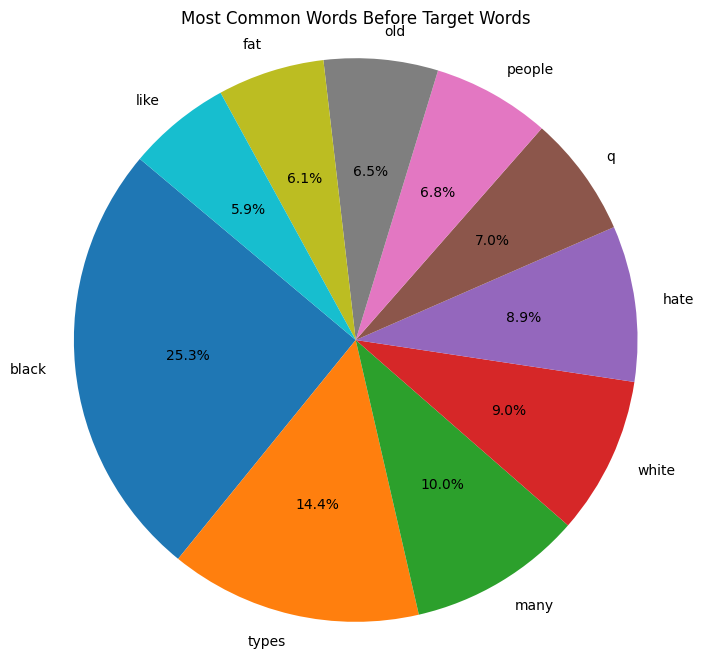

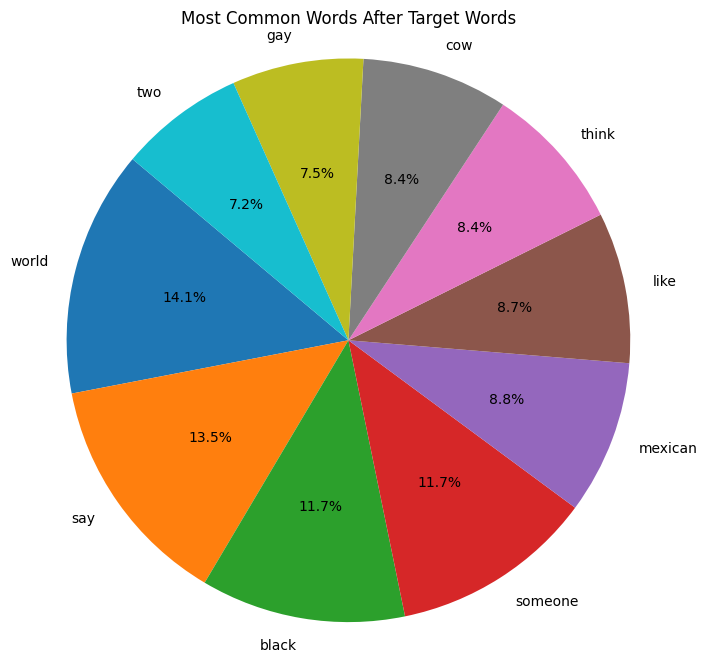

In [24]:
import matplotlib.pyplot as plt

# Function to plot word counts as a pie chart
def plot_word_counts_pie(word_counts, title):
    words, counts = zip(*word_counts.most_common(10))
    plt.figure(figsize=(8, 8)) 
    plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  
    plt.show()

plot_word_counts_pie(before_words, 'Most Common Words Before Target Words')
plot_word_counts_pie(after_words, 'Most Common Words After Target Words')


##### These Pie charts display the most common words that occur before and after specific target words. This analysis is key in predicting words based on their position relative to key words in jokes. Understanding which words commonly precede or follow significant words in jokes can greatly enhance the accuracy of next-word prediction models by incorporating positional context.

### Sentiment Analysis on the Dataset

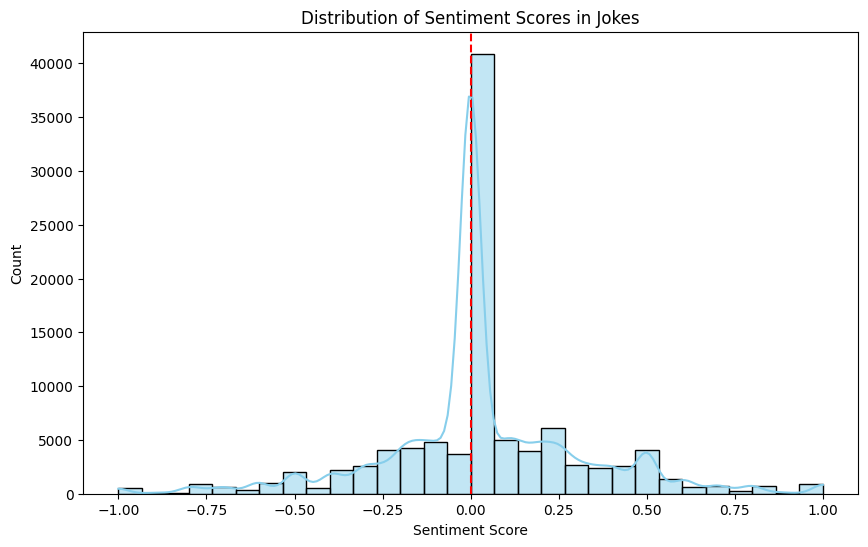

In [25]:
from textblob import TextBlob

# Sentiment analysis on each joke
jokes_df['Sentiment'] = jokes_df['Joke'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the distribution of sentiment values
plt.figure(figsize=(10, 6))
sns.histplot(jokes_df['Sentiment'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentiment Scores in Jokes')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.axvline(x=0, color='red', linestyle='--') 
plt.show()

#### This histogram shows the sentiment scores of jokes, allowing an understanding of the emotional content of jokes. Sentiment analysis can help in understanding the emotional tone of parts of a joke, which can be predictive of the kinds of words that might follow (e.g., more negative or positive words). Here sentiment score ranging from -1 (very negative) to 1 (very positive), with scores around 0 indicating a neutral sentiment.